In [4]:
## 模型大小测试

## 语法正确率
'''

大论文/4评估/微调后模型推理结果/model_size_Qwen2.50.5B_my_prompt.json_result.json
大论文/4评估/微调后模型推理结果/model_size_Qwen2.51.5B_my_prompt.json_result.json 
大论文/4评估/微调后模型推理结果/model_size_Qwen2.53B_my_prompt.json_result.json 
大论文/4评估/微调后模型推理结果/model_size_Qwen2.57B_my_prompt.json_result.json 
大论文/4评估/微调后模型推理结果/model_size_Qwen2.514B_my_prompt.json_result.json 
大论文/4评估/微调后模型推理结果/model_size_Qwen2.532B_my_prompt.json_result.json

'''
files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.50.5B_my_prompt.json_fix.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.51.5B_my_prompt.json_fix.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.53B_my_prompt.json_fix.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.514B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.532B_my_prompt.json_result.json",
]
import json



SVP_data = []

for index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    for row in   GLM49B_train_normal_prompt:
        if row['err'] == True:
            # print(row['instruction'])
            # print(row['output'])
            # print("---------------------------------------")
            err_num = err_num+1

    print(f"{file}结果大小:{len(GLM49B_train_normal_prompt)}.错误个数:{err_num},语法正确率为{1-err_num/len(GLM49B_train_normal_prompt)}")

    SVP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100)) 

/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.50.5B_my_prompt.json_fix.json_result.json结果大小:385.错误个数:231,语法正确率为0.4
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.51.5B_my_prompt.json_fix.json_result.json结果大小:385.错误个数:10,语法正确率为0.974025974025974
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.53B_my_prompt.json_fix.json_result.json结果大小:385.错误个数:8,语法正确率为0.9792207792207792
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.57B_my_prompt.json_result.json结果大小:385.错误个数:6,语法正确率为0.9844155844155844
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.514B_my_prompt.json_result.json结果大小:385.错误个数:3,语法正确率为0.9922077922077922
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.532B_my_prompt.json_result.json结果大小:385.错误个数:1,语法正确率为0.9974025974025974


In [5]:
### 语义正确率分析  精确率 召回率  行、列分别分析
import json


with open("/home/work/liuytest/大论文/4评估/ldbc_normal_test_7_3.json_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.50.5B_my_prompt.json_fix.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.51.5B_my_prompt.json_fix.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.53B_my_prompt.json_fix.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.514B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.532B_my_prompt.json_result.json",
]


with open("/home/work/liuytest/大论文/4评估/ldbc_normal_test_7_3.json_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

print("对比结果的大小:",len(core_train_result))
 
SVP_data_recall = []
 
SVP_data_precision = []
 

for file_index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    total_recall=0
    total_precision = 0
    for index,row in   enumerate(GLM49B_train_normal_prompt) :

        if row['err'] == True:
            err_num = err_num+1
            single_query_recall = 0
            single_query_precision = 0
        else:
            correct_row = core_train_result[index]
            if correct_row['output'] == row['output']:
                # print("bangbangbangbangbangbangbangbangbangbangbangbangbangbang")
                pass
            label_rows =  correct_row['rows']
            
            pred_rows = row['rows']
            
            len_total_row = len(label_rows)
            
            if len_total_row != len(pred_rows):
                single_query_recall = 0
                single_query_precision = 0
            else:
                recall=0
                precision = 0
                for index,label_row in  enumerate(label_rows):
                    label_row = [str(data) for data in list(label_row)]
                    pred_colums_set = set(label_row)
                    pred_row = pred_rows[index]
                    pred_row = [str(data) for data in list(pred_row)]
                    label_colums_set = set(pred_row)
                    intersection = pred_colums_set.intersection(label_colums_set)
                    if len(intersection) == len(label_colums_set):
                        # print("colum bangbangbang")
                        pass
                    ### 列的语义分析准确率     回收率
                    recall =  recall+ len(intersection)/len(label_colums_set) *100  
                    ### 列的语义分析准确率     精确率
                    precision = precision + len(intersection)/len(pred_colums_set) *100 
                single_query_recall = recall/len_total_row
                single_query_precision = precision/len_total_row 
        total_recall = total_recall + single_query_recall
        total_precision = total_precision + single_query_precision
    total_recall = total_recall/len(GLM49B_train_normal_prompt)
    total_precision= total_precision/len(GLM49B_train_normal_prompt)                                        
    print(f"{file}的语义回收率为{total_recall}，语义精确率为{total_precision}")        
            
    

    SVP_data_recall.append(total_recall)
    SVP_data_precision.append(total_precision)

                           
   

            



对比结果的大小: 385
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.50.5B_my_prompt.json_fix.json_result.json的语义回收率为5.103896103896105，语义精确率为4.804801259346714
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.51.5B_my_prompt.json_fix.json_result.json的语义回收率为78.78134129114548，语义精确率为78.01278356863921
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.53B_my_prompt.json_fix.json_result.json的语义回收率为78.59113083171194，语义精确率为77.82016932413785
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.57B_my_prompt.json_result.json的语义回收率为84.87681669811224，语义精确率为83.60508678339704
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.514B_my_prompt.json_result.json的语义回收率为88.17845376314199，语义精确率为87.14157186666125
/home/work/liuytest/大论文/4评估/1数据预处理/model_size_Qwen2.532B_my_prompt.json_result.json的语义回收率为91.44331980328633，语义精确率为90.21777287934245


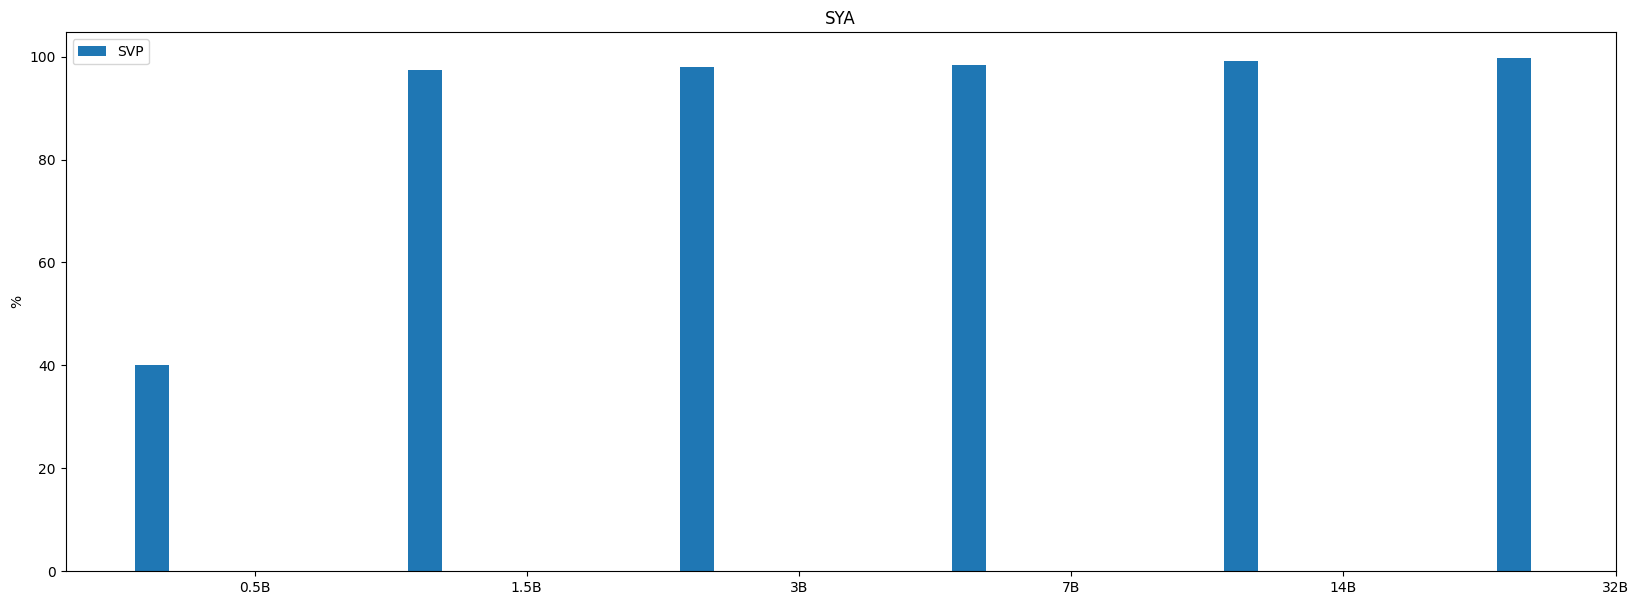

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['0.5B','1.5B','3B','7B','14B','32B']
penguin_means = {
    'SVP':SVP_data
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('SYA')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

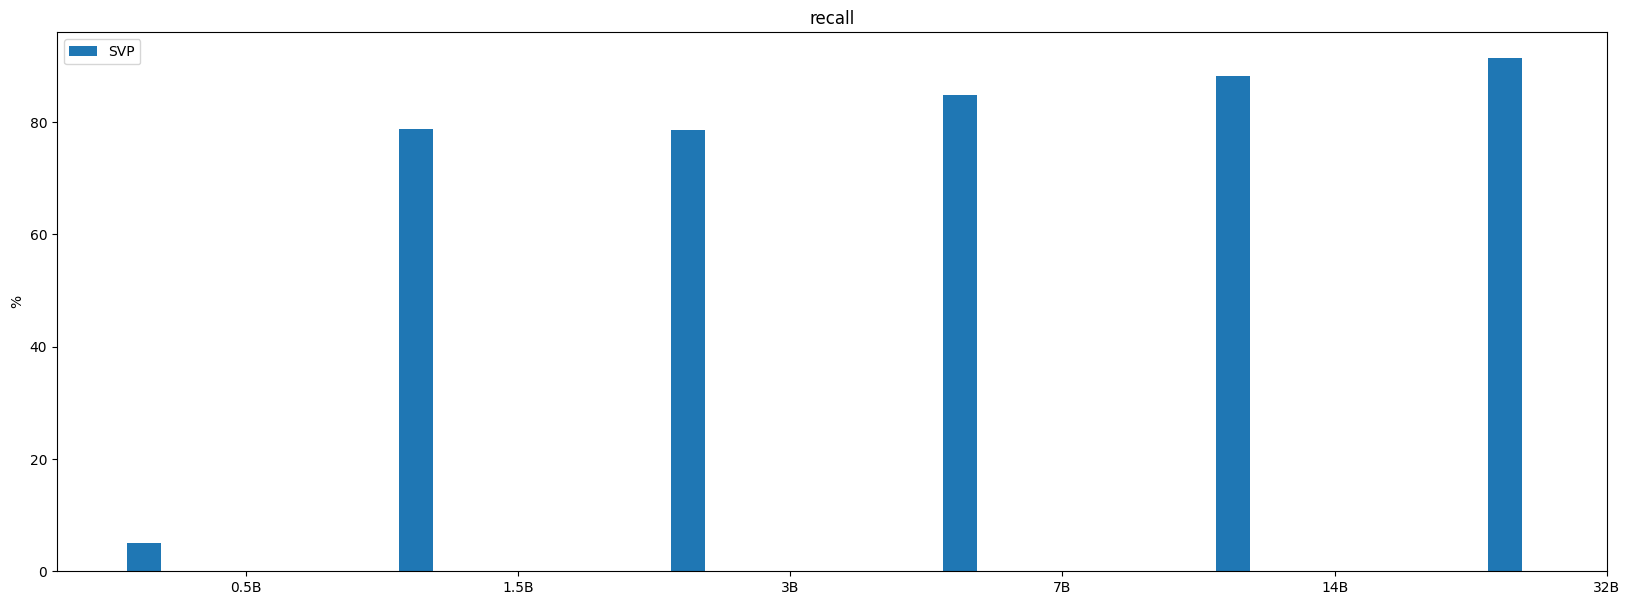

In [7]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['0.5B','1.5B','3B','7B','14B','32B']
penguin_means = {
    'SVP': SVP_data_recall,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('recall')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

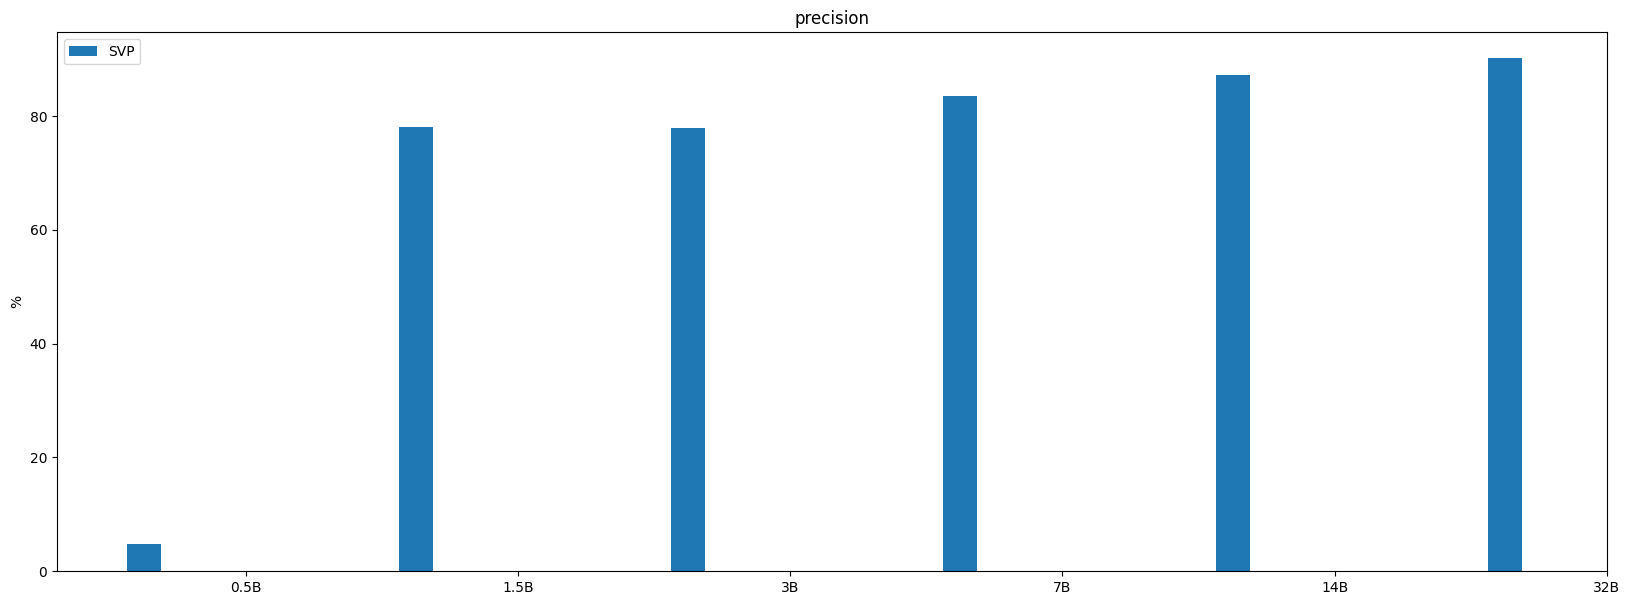

In [9]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['0.5B','1.5B','3B','7B','14B','32B']
penguin_means = {
    'SVP': SVP_data_precision,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('precision')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()